In [18]:
import pandas as pd

file_path = '../data/melb_data.csv'
home_data = pd.read_csv(file_path)

# Prepare data for visualization (only rows without missing coordinates)
viz_data = home_data.dropna(subset=['Lattitude', 'Longtitude', 'Price'])
viz_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


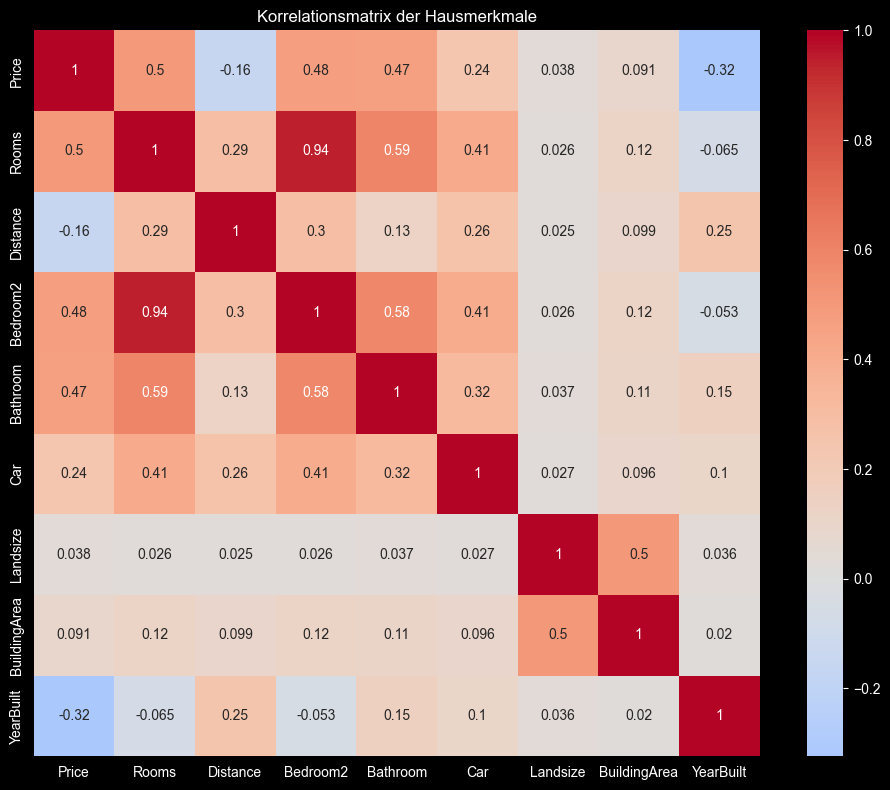

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix of numeric features
plt.figure(figsize=(10, 8))
numeric_features = ['Price', 'Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']
correlation_data = viz_data[numeric_features].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Korrelationsmatrix der Hausmerkmale')
plt.tight_layout()
plt.show()

In [20]:
import folium
from folium.plugins import HeatMap

# Melbourne Zentrum Koordinaten
melbourne_center = [-37.8136, 144.9631]

# Karte von Melbourne erstellen
m = folium.Map(
    location=melbourne_center,
    zoom_start=11,
    tiles='OpenStreetMap'
)

# Heatmap Layer für Hauspreise hinzufügen
heat_data = [[row['Lattitude'], row['Longtitude'], row['Price']]
             for idx, row in viz_data.iterrows()]

HeatMap(heat_data, radius=10, blur=15).add_to(m)

# Karte anzeigen
m